# Machine Learning Competitions

## Introducción

En este ejercicio, crearás y enviarás predicciones para un concurso de Kaggle. A continuación, podrás mejorar tu modelo (por ejemplo, añadiendo características) para aplicar lo que has aprendido y ascender en la tabla de clasificación.

Comienza ejecutando la celda de código que aparece a continuación para configurar la comprobación del código y las rutas de los archivos para el conjunto de datos.

In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(10,7)})
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 150)

# Load the data, and separate the target
train = pd.read_csv("iowa_houses_train.csv")
test = pd.read_csv("iowa_houses_test.csv")
y = train.SalePrice

# Create X (After completing the exercise, you can return to modify this line!)
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']

# Select columns corresponding to features, and preview the data
X = train[features]
X.head()

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Define a random forest model
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))

Validation MAE for Random Forest Model: 21,857


In [12]:
home_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Visualizations

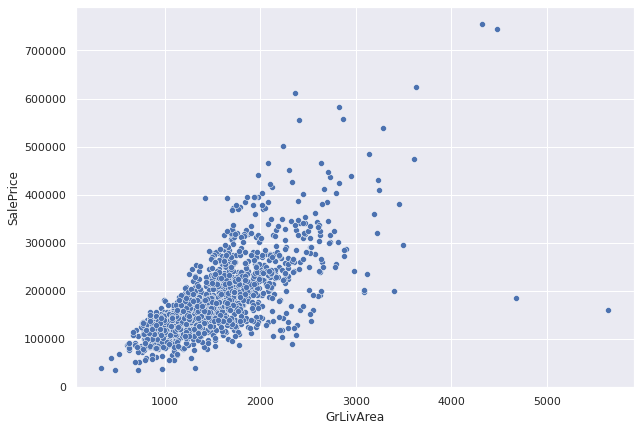

In [56]:
#lets create scatterplot of GrLivArea and SalePrice
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train);

In [57]:
#as per above plot we can see there are two outliers which can affect on out model,lets remove those outliers
index = train.loc[(train['GrLivArea']>4000) & (train['SalePrice']<200000)].index
train = train.drop(index=index).reset_index(drop=True)

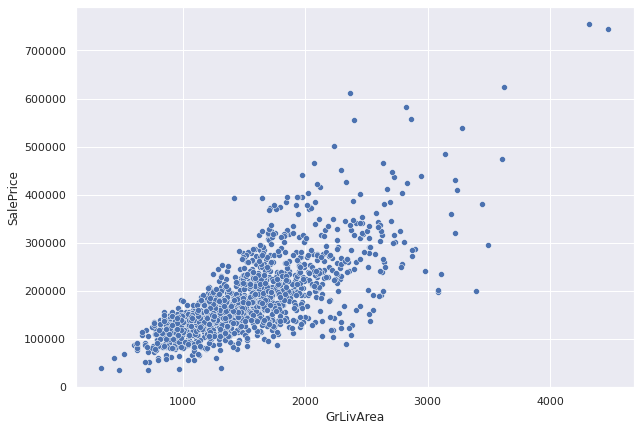

In [58]:
#lest we how its look after removing outliers
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train);

In [65]:
#lets create heatmap first of all lest see on which feature SalePrice is dependent
corr=train.drop(columns='Id').corr().sort_values(by='SalePrice',ascending=False).round(2)
corr['SalePrice'].to_frame()

,SalePrice
SalePrice,1.00
OverallQual,0.80
GrLivArea,0.73
TotalBsmtSF,0.65
GarageCars,0.64
1stFlrSF,0.63
GarageArea,0.63
FullBath,0.56
TotRmsAbvGrd,0.54
YearBuilt,0.52


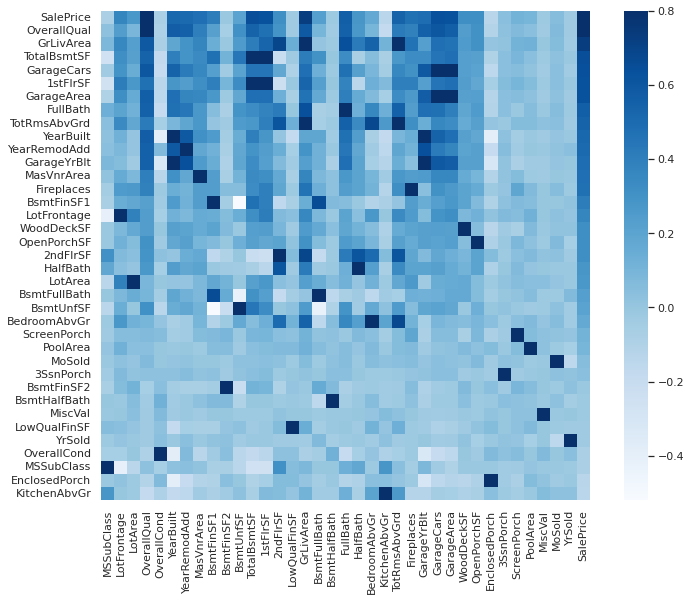

In [72]:
#here we can see SalePrice mostly dependent on this features OverallQual,GrLivArea,TotalBsmtSF,GarageCars,1stFlrSF,GarageArea 
plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True, cmap="Blues");

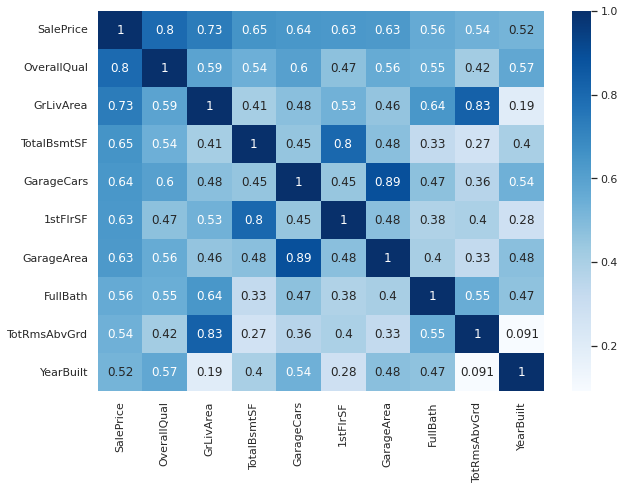

In [74]:
#now lets create heatmap for top 10 correlated features
cols =corr['SalePrice'].head(10).index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, annot=True, yticklabels=cols.values, xticklabels=cols.values, cmap="Blues")
plt.show()

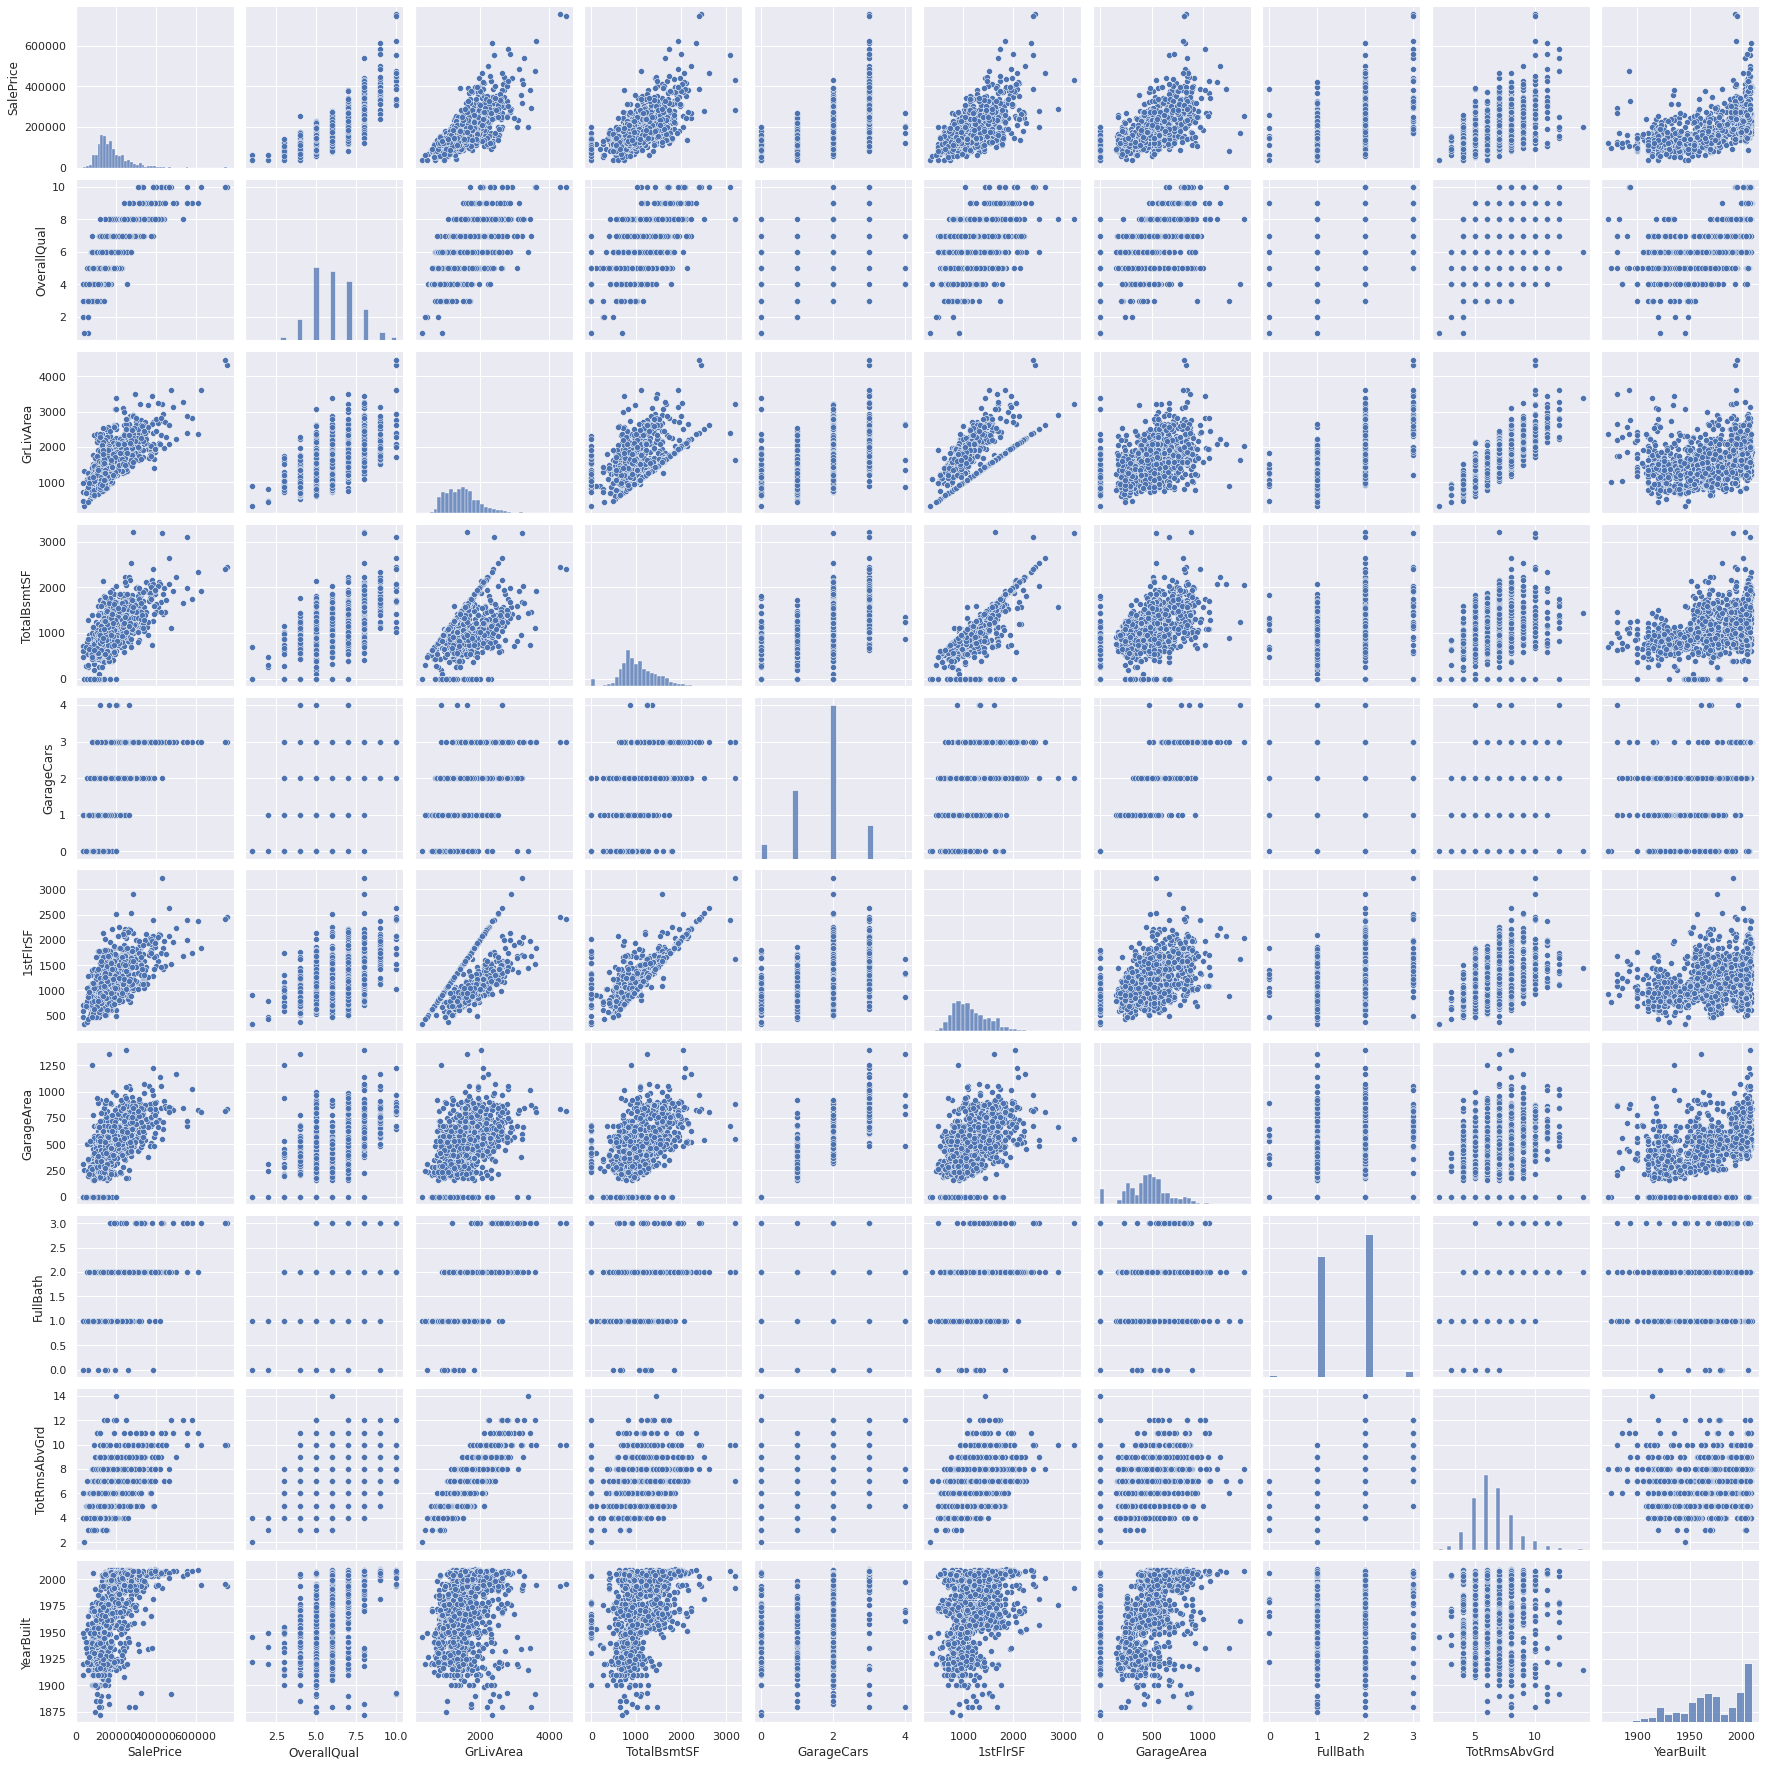

In [75]:
#lets see relation of 10 feature with SalePrice through Pairplot
sns.pairplot(train[corr['SalePrice'].head(10).index]);

In [76]:
#lets store number of test and train rows
trainrow=train.shape[0]
testrow=test.shape[0]

In [77]:
#copying id data
testids=test['Id'].copy()

In [78]:
#copying sales priece
y_train=train['SalePrice'].copy()

In [81]:
#combining train and test data
data=pd.concat((train,test)).reset_index(drop=True)
data=data.drop(columns=['SalePrice', 'Id'])

## Missing Data

In [87]:
#checking missing data
missing=data.isnull().sum().sort_values(ascending=False)
missing=missing.drop(missing[missing==0].index)
missing.to_frame().rename(columns={0: "missing data"})

,missing data
PoolQC,2908
MiscFeature,2812
Alley,2719
Fence,2346
FireplaceQu,1420
LotFrontage,486
GarageYrBlt,159
GarageFinish,159
GarageQual,159
GarageCond,159


In [88]:
#PoolQC is quality of pool but mostly house does not have pool so putting NA
data['PoolQC']=data['PoolQC'].fillna('NA')
data['PoolQC'].unique()

array(['NA', 'Ex', 'Fa', 'Gd'], dtype=object)

In [89]:
#MiscFeature: mostly house does not have it so putting NA
data['MiscFeature']=data['MiscFeature'].fillna('NA')
data['MiscFeature'].unique()

array(['NA', 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [90]:
#Alley,Fence,FireplaceQu: mostly house does not have it so putting NA
data['Alley']=data['Alley'].fillna('NA')
data['Alley'].unique()

data['Fence']=data['Fence'].fillna('NA')
data['Fence'].unique()

data['FireplaceQu']=data['FireplaceQu'].fillna('NA')
data['FireplaceQu'].unique()

array(['NA', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [91]:
#LotFrontage: all house have linear connected feet so putting most mean value
data['LotFrontage']=data['LotFrontage'].fillna(data['LotFrontage'].dropna().mean())

In [92]:
#GarageCond,GarageQual,GarageFinish
data['GarageCond']=data['GarageCond'].fillna('NA')
data['GarageCond'].unique()

data['GarageQual']=data['GarageQual'].fillna('NA')
data['GarageQual'].unique()

data['GarageFinish']=data['GarageFinish'].fillna('NA')
data['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', 'NA'], dtype=object)

In [93]:
#GarageYrBlt,GarageType,GarageArea,GarageCars putting 0
data['GarageYrBlt']=data['GarageYrBlt'].fillna(0)
data['GarageType']=data['GarageType'].fillna(0)
data['GarageArea']=data['GarageArea'].fillna(0)
data['GarageCars']=data['GarageCars'].fillna(0)

In [94]:
#BsmtExposure,BsmtCond,BsmtQual,BsmtFinType2,BsmtFinType1 
data['BsmtExposure']=data['BsmtExposure'].fillna('NA')
data['BsmtCond']=data['BsmtCond'].fillna('NA')
data['BsmtQual']=data['BsmtQual'].fillna('NA')
data['BsmtFinType2']=data['BsmtFinType2'].fillna('NA')
data['BsmtFinType1']=data['BsmtFinType1'].fillna('NA')

#BsmtFinSF1,BsmtFinSF2 
data['BsmtFinSF1']=data['BsmtFinSF1'].fillna(0)
data['BsmtFinSF2']=data['BsmtFinSF2'].fillna(0)

In [95]:
#MasVnrType,MasVnrArea
data['MasVnrType']=data['MasVnrType'].fillna('NA')
data['MasVnrArea']=data['MasVnrArea'].fillna(0)

In [96]:
#MSZoning 
data['MSZoning']=data['MSZoning'].fillna(data['MSZoning'].dropna().sort_values().index[0])

In [97]:
#Utilities
data['Utilities']=data['Utilities'].fillna(data['Utilities'].dropna().sort_values().index[0])

In [98]:
#BsmtFullBath
data['BsmtFullBath']=data['BsmtFullBath'].fillna(0)
#Functional
data['Functional']=data['Functional'].fillna(data['Functional'].dropna().sort_values().index[0])
#BsmtHalfBath
data['BsmtHalfBath']=data['BsmtHalfBath'].fillna(0)
#BsmtUnfSF
data['BsmtUnfSF']=data['BsmtUnfSF'].fillna(0)
#Exterior2nd
data['Exterior2nd']=data['Exterior2nd'].fillna('NA')
#Exterior1st
data['Exterior1st']=data['Exterior1st'].fillna('NA')
#TotalBsmtSF
data['TotalBsmtSF']=data['TotalBsmtSF'].fillna(0)
#SaleType
data['SaleType']=data['SaleType'].fillna(data['SaleType'].dropna().sort_values().index[0])
#Electrical
data['Electrical']=data['Electrical'].fillna(data['Electrical'].dropna().sort_values().index[0])
#KitchenQual
data['KitchenQual']=data['KitchenQual'].fillna(data['KitchenQual'].dropna().sort_values().index[0])

In [99]:
#lets check any missing remain
missing=data.isnull().sum().sort_values(ascending=False)
missing=missing.drop(missing[missing==0].index)
missing

Series([], dtype: int64)

## Feature Engineering

In [100]:
#as we know some feature are highly co-related with SalePrice so lets create some feature using these features
data['GrLivArea_2']=data['GrLivArea']**2
data['GrLivArea_3']=data['GrLivArea']**3
data['GrLivArea_4']=data['GrLivArea']**4

data['TotalBsmtSF_2']=data['TotalBsmtSF']**2
data['TotalBsmtSF_3']=data['TotalBsmtSF']**3
data['TotalBsmtSF_4']=data['TotalBsmtSF']**4

data['GarageCars_2']=data['GarageCars']**2
data['GarageCars_3']=data['GarageCars']**3
data['GarageCars_4']=data['GarageCars']**4

data['1stFlrSF_2']=data['1stFlrSF']**2
data['1stFlrSF_3']=data['1stFlrSF']**3
data['1stFlrSF_4']=data['1stFlrSF']**4

data['GarageArea_2']=data['GarageArea']**2
data['GarageArea_3']=data['GarageArea']**3
data['GarageArea_4']=data['GarageArea']**4

In [101]:
#lets add 1stFlrSF and 2ndFlrSF and create new feature floorfeet
data['Floorfeet']=data['1stFlrSF']+data['2ndFlrSF']
data=data.drop(columns=['1stFlrSF','2ndFlrSF'])

/tmp/ipykernel_190/1769331744.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data=data.drop(['1stFlrSF','2ndFlrSF'],1)


In [ ]:
#MSSubClass,MSZoning
data=pd.get_dummies(data=data,columns=['MSSubClass'],prefix='MSSubClass')
data=pd.get_dummies(data=data,columns=['MSZoning'],prefix='MSZoning')

In [106]:
#Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle
data=pd.get_dummies(data=data,columns=['Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle'])
data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GrLivArea_2,GrLivArea_3,GrLivArea_4,TotalBsmtSF_2,TotalBsmtSF_3,TotalBsmtSF_4,GarageCars_2,GarageCars_3,GarageCars_4,1stFlrSF_2,1stFlrSF_3,1stFlrSF_4,...,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_0,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,65.0,8450,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,2924100,5000211000,8550360810000,732736.0,6.272220e+08,5.369020e+11,4.0,8.0,16.0,732736,627222016,536902045696,...,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,80.0,9600,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,1592644,2009916728,2536514910736,1592644.0,2.009917e+09,2.536515e+12,4.0,8.0,16.0,1592644,2009916728,2536514910736,...,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,68.0,11250,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,3189796,5696975656,10174798521616,846400.0,7.786880e+08,7.163930e+11,4.0,8.0,16.0,846400,778688000,716392960000,...,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,60.0,9550,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,2948089,5061868813,8691228751921,571536.0,4.320812

In [107]:
#OverallQual
data=pd.get_dummies(data=data,columns=['OverallQual'],prefix='OverallQual')

In [108]:
#OverallCond
data=pd.get_dummies(data=data,columns=['OverallCond'],prefix='OverallCond')

In [109]:
#we have remodel year data so lest one new feature home is remodeled or not
data['Remodeled']=0
data.loc[data['YearBuilt']!=data['YearRemodAdd'],'Remodeled']=1
data=data.drop(columns='YearRemodAdd')
data=pd.get_dummies(data=data,columns=['Remodeled'])

In [110]:
#creating dummies fo all categorical data
data=pd.get_dummies(data=data,columns=['RoofStyle','RoofMatl','Exterior1st',
                                       'Exterior2nd','MasVnrType','ExterQual',
                                       'ExterCond','Foundation','BsmtQual','BsmtCond',
                                       'BsmtExposure','BsmtFinType1','BsmtFinType2',
                                       'Heating','HeatingQC','CentralAir','Electrical',
                                       'KitchenQual','Functional','FireplaceQu','GarageType',
                                       'GarageFinish','GarageQual','GarageCond','PavedDrive',
                                       'PoolQC','Fence','MiscFeature','SaleType','SaleCondition'
                                      ]
)

In [112]:
#lets add all bath in one feature
data['Bath']=data['BsmtFullBath']+data['BsmtHalfBath']*.5+data['FullBath']+data['HalfBath']*.5
data=data.drop(columns=['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'])

In [113]:
#dummies
data=pd.get_dummies(data=data,columns=['BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd'])

In [114]:
#here we  has one more outliers lets replace it with 0
data.loc[data['GarageYrBlt']==2207.,'GarageYrBlt']=0

## Feature Scalling

In [116]:
#lets import StandardScaler from sklearn for feature scalling
from sklearn.preprocessing import StandardScaler

In [117]:
#lets split data using trainrow data and scale data
x_train=data.iloc[:trainrow]
x_test=data.iloc[trainrow:]
scaler=StandardScaler()
scaler=scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

## Lets do modeling: 

### LinearRegression

In [118]:
from sklearn.linear_model import LinearRegression
reg_liner=LinearRegression()
reg_liner.fit(x_train_scaled,y_train)
reg_liner.score(x_train_scaled,y_train)

0.9561678845072912

### LogisticRegression

In [119]:
from sklearn.linear_model import LogisticRegression
reg_logistic=LogisticRegression()
reg_logistic.fit(x_train_scaled,y_train)
print(reg_logistic.score(x_train_scaled,y_train))

0.9993141289437586


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### XGBoost

In [120]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model.fit(x_train_scaled, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(x_train_scaled, y_train)], 
             verbose=False)
print(my_model.score(x_train_scaled,y_train))

0.9998801634815175


### DecisionTree

In [121]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(criterion='mse',max_depth=3)
tree.fit(x_train_scaled,y_train)
print(tree.score(x_train_scaled,y_train))

0.7108967951534926


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


### Support Vector Regression

In [123]:
from sklearn import svm
svm_model=svm.SVC()
svm_model.fit(x_train_scaled,y_train)
print(svm_model.score(x_train_scaled,y_train))

0.31069958847736623


### Naive Bayes

In [142]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
gnb=GaussianNB()
mnb=MultinomialNB()
gnb.fit(x_train_scaled,y_train)
mnb.fit(x_train,y_train)
print(f"GaussianNB: {gnb.score(x_train_scaled,y_train)}")
print(f"MultinomialNB {mnb.score(x_train,y_train)}")

GaussianNB: 0.9128943758573388
MultinomialNB 0.28532235939643347


### Random Forest

In [141]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=500)
rfr.fit(x_train_scaled,y_train)
print(rfr.score(x_train_scaled,y_train))

0.984521233969125
